In [1]:
from qiskit import *

In [2]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)

In [3]:
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

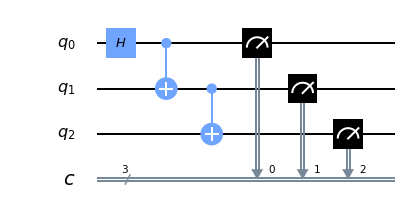

In [6]:
%matplotlib inline
circuit.draw(output='mpl')

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result_sim = execute(circuit, backend=simulator, shots=1024).result()

In [8]:
from qiskit.visualization import plot_histogram

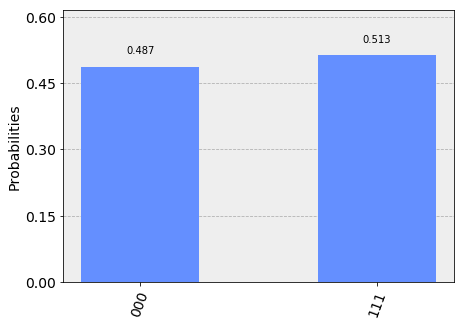

In [9]:
plot_histogram(result_sim.get_counts(circuit))

In [10]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [11]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())

from qiskit.tools.monitor import job_monitor
job_monitor(job)

5da215050dfc860018b4a434
Job Status: job has successfully run


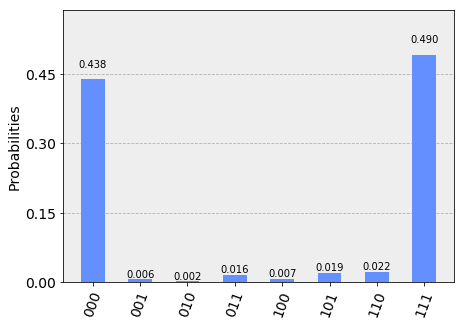

In [12]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))